# Linear Regression

In [22]:
#import library
import numpy as np
import pandas as pd

In [23]:
# Read the data
df = pd.read_csv('StudentsPerformance.csv',header = 0)

In [24]:
# create total score varialbe
df['total_score'] = (df['math score'] + df['reading score'] +df['writing score'])/3

In [25]:
X = df.drop('total_score',axis = 1)
X = pd.get_dummies(X)
y = df['total_score']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3 ,random_state =42)

In [30]:
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test ,y_pred)
print(mse)
print(reg.coef_)
print(reg.intercept_)

3.5173730041994474e-28
[ 3.33333333e-01  3.33333333e-01  3.33333333e-01  9.75348274e-16
 -9.77082998e-16  8.95496784e-16  3.27212216e-16 -7.88214979e-17
 -1.55496276e-15  4.16333634e-16 -1.96435750e-15  1.07617908e-15
  3.79037080e-16  4.51624415e-16  2.70508442e-16 -2.09467860e-16
 -8.60422844e-16  8.60422844e-16 -4.24573571e-16  4.23706209e-16]
7.105427357601002e-14


In [31]:
rmse = np.sqrt(mse)
rmse

1.8754660765258985e-14

## Random Forest

In [32]:
#import library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [33]:
df = pd.read_csv('StudentsPerformance.csv',header = 0)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [34]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


array([[<AxesSubplot:title={'center':'math score'}>,
        <AxesSubplot:title={'center':'reading score'}>],
       [<AxesSubplot:title={'center':'writing score'}>, <AxesSubplot:>]],
      dtype=object)

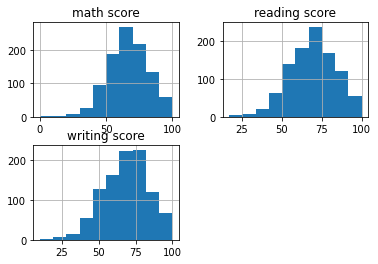

In [35]:
df.hist()

In [36]:
# Check for null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

No Null Values in the dataset

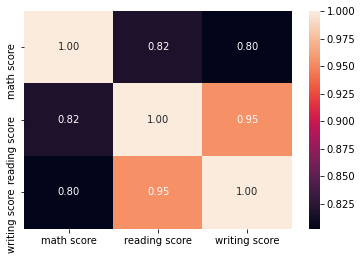

In [9]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

In [43]:

#Getting Data Points for All Scores availbale
num_var = pd.read_csv("StudentsPerformance.csv",header = 0,
                           usecols = ['math score','reading score','writing score'])
#Getting Test Prep Course Values
label_var = pd.read_csv("StudentsPerformance.csv",header = 0,usecols=['test preparation course'])

In [44]:
#Load MinMaxScaler
M_scaler = MinMaxScaler()
M_scaler.fit(num_var) #Fitting the Scores
trans_var = M_scaler.transform(num_var) #Transform the Scores

In [45]:
#Load Label Encoder
encoder = LabelEncoder()
encoder.fit(label_var)
trans_label = encoder.transform(label_var)

c:\users\fbhug\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [46]:
#Split train and test
X_train, X_test, y_train, y_test = train_test_split(trans_var,trans_label, test_size = 0.3 ,random_state =42)

In [47]:
#Random Forest Classifier:
RF = RandomForestClassifier(n_estimators = 10,random_state=5)

In [49]:
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=5)

In [50]:
RF.fit(X_test, y_test)

RandomForestClassifier(n_estimators=10, random_state=5)

In [51]:
RF.score(X_train, y_train)


0.5942857142857143

In [52]:
RF.score(X_test, y_test)


0.9866666666666667